ACTUAL IMPLEMENTATION:
    
df=pd.read_csv("bike_classification.csv")

train_df, test_df=train_test_split(df,test_size_proportion=0.3)

tree=decision_tree_algorithm(train_df)

accuracy=calculate_accuracy(test_df,tree)

## Import Statements

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

## Load and prepare data

In [45]:
'''last column is our label used for classification and there should be no missing value, it is renamed as label'''
df=df.rename(columns={"BikeType":"label"})
df.head()

,Engine(cc),Power(bhp),Weight(lbs),Mileage(km),Price(Rs),label
0,999,199.0,410,27,400000,sports
1,200,12.5,260,55,100000,mileage
2,110,6.2,176,40,55000,moped
3,1200,210.0,390,25,290000,sports
4,1000,208.0,410,29,330000,sports


In [46]:
''' Gives information about the number of rows, columns, data type etc'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
Engine(cc)     47 non-null int64
Power(bhp)     47 non-null float64
Weight(lbs)    47 non-null int64
Mileage(km)    47 non-null int64
Price(Rs)      47 non-null int64
label          47 non-null object
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ KB


## train-test-split function

In [47]:
def train_test_split(df,test_size):
    if isinstance(test_size,float):
        test_size=round(test_size * len(df))
    indices=df.index.tolist()
    test_indices=random.sample(population=indices,k=test_size)   #to randomly select train test indices
    print(test_indices)
    test_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    
    return train_df,test_df

In [48]:
train_df,test_df=train_test_split(df,test_size=0.3)
random.seed(0)
test_df.head()


[45, 33, 17, 46, 15, 13, 37, 26, 40, 44, 28, 31, 22, 5]


,Engine(cc),Power(bhp),Weight(lbs),Mileage(km),Price(Rs),label
45,190,8.7,250,50,100000,mileage
33,110,9.8,290,88,70000,mileage
17,1000,202.0,370,31,320000,sports
46,270,28.0,290,34,200000,highway
15,125,8.0,250,60,115000,mileage


## Helper functions

For implementation of the main algorithm, we need certain functions.They are calculated here

In [49]:
data=test_df.values
data[:5]

array([[190, 8.7, 250, 50, 100000, 'mileage'],
       [110, 9.8, 290, 88, 70000, 'mileage'],
       [1000, 202.0, 370, 31, 320000, 'sports'],
       [270, 28.0, 290, 34, 200000, 'highway'],
       [125, 8.0, 250, 60, 115000, 'mileage']], dtype=object)

### data pure

In [50]:
'''To check data purity: i.e to know whether our classification is generating only one label'''
def check_purity(data):
    label_column=data[:,-1]
    unique_classes=np.unique(label_column)

    if len(unique_classes)==1:
        return True
    else:
        return False

### classify

In [51]:
def classify_data(data):
    label_column=data[:,-1]
    unique_classes, count_unique_classes=np.unique(label_column,return_counts=True)

    index=count_unique_classes.argmax()
    classification=unique_classes[index]  #since this label appears max no of times, it is the classification
     
    return classification

In [52]:
#classify_data(train_df[train_df['Mileage(km)']>50].values)

### potential splits

In [53]:
'''
This function determines the various ways in which splitting of data can happen that will result in better classification.

'''
def get_potential_splits(data):
    potential_splits={}
    _, n_columns=data.shape
    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]
        values=data[:,column_index]
        unique_values=np.unique(values)
    
        for index in range(len(unique_values)):
            if index!=0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split=(current_value+previous_value)/2
            
            
                potential_splits[column_index].append(potential_split)
    
    return potential_splits


In [54]:
# if column_index==4:
# print(values)

In [55]:
potential_splits=get_potential_splits(train_df.values)
potential_splits

{0: [100.0,
  117.5,
  137.5,
  175.0,
  205.0,
  215.0,
  222.5,
  237.0,
  259.5,
  275.0,
  285.0,
  295.0,
  305.0,
  325.0,
  345.0,
  635.0,
  959.0,
  998.5,
  999.5,
  1100.0],
 1: [5.25,
  5.65,
  5.9,
  6.1,
  6.25,
  6.4,
  6.75,
  7.1,
  7.85,
  9.25,
  11.25,
  12.75,
  14.4,
  16.9,
  18.5,
  19.65,
  23.15,
  26.05,
  26.55,
  27.25,
  27.75,
  28.5,
  29.5,
  75.0,
  155.0,
  193.5,
  198.0,
  199.5,
  204.0,
  209.0],
 2: [150.0,
  165.0,
  173.0,
  177.0,
  179.0,
  183.5,
  188.0,
  189.5,
  195.0,
  205.0,
  215.0,
  230.0,
  250.0,
  265.0,
  275.0,
  283.0,
  287.0,
  289.0,
  292.5,
  297.5,
  345.0,
  400.0,
  425.0],
 3: [21.5,
  26.0,
  27.5,
  28.5,
  30.5,
  33.0,
  34.5,
  35.5,
  36.5,
  37.5,
  38.5,
  39.5,
  41.0,
  42.5,
  43.5,
  44.5,
  47.0,
  50.5,
  53.5,
  56.5,
  59.0],
 4: [53500.0,
  56000.0,
  58500.0,
  61500.0,
  64000.0,
  66500.0,
  69000.0,
  72500.0,
  87500.0,
  107500.0,
  120000.0,
  129000.0,
  134000.0,
  142500.0,
  160000.0,
  18

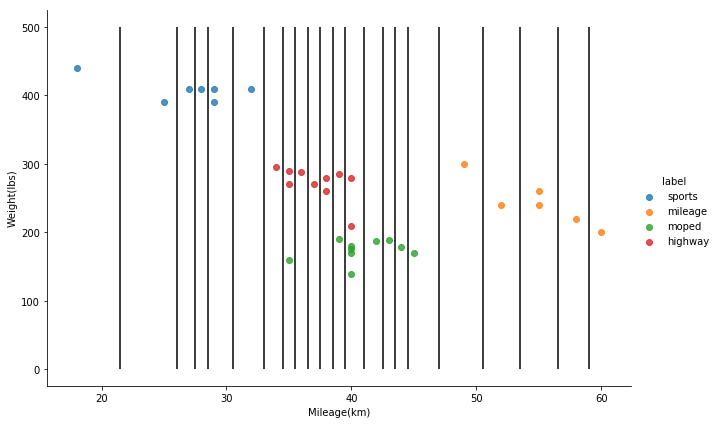

In [56]:
'''Plot describing the various potential splits'''
sns.lmplot(data=train_df, x="Mileage(km)",y="Weight(lbs)",hue="label",fit_reg=False,height=6,aspect=1.5)
plt.vlines(x=potential_splits[3],ymin=1,ymax=500)
#plt.hlines(y=potential_splits[2],xmin=1,xmax=200)

### Split data

In [57]:
'''based on values from potential split, we create data below and data above that value'''
def split_data(data,split_column, split_value):
    split_column_values=data[:,split_column]
    data_above=data[split_column_values >split_value]
    data_below=data[split_column_values <=split_value] 
    return data_below,data_above

In [58]:
split_column=1
split_value=100
data

array([[190, 8.7, 250, 50, 100000, 'mileage'],
       [110, 9.8, 290, 88, 70000, 'mileage'],
       [1000, 202.0, 370, 31, 320000, 'sports'],
       [270, 28.0, 290, 34, 200000, 'highway'],
       [125, 8.0, 250, 60, 115000, 'mileage'],
       [125, 15.6, 300, 60, 80000, 'mileage'],
       [300, 29.0, 300, 36, 200000, 'highway'],
       [920, 209.0, 410, 28, 298000, 'sports'],
       [300, 29.0, 260, 37, 195000, 'highway'],
       [110, 5.2, 165, 45, 60000, 'moped'],
       [320, 28.0, 289, 36, 180000, 'highway'],
       [1000, 190.0, 360, 29, 310000, 'sports'],
       [920, 200.0, 400, 28, 300000, 'sports'],
       [150, 7.0, 190, 38, 70000, 'moped']], dtype=object)

In [59]:
data_below,data_above=split_data(data,split_column,split_value)
data_above

array([[1000, 202.0, 370, 31, 320000, 'sports'],
       [920, 209.0, 410, 28, 298000, 'sports'],
       [1000, 190.0, 360, 29, 310000, 'sports'],
       [920, 200.0, 400, 28, 300000, 'sports']], dtype=object)

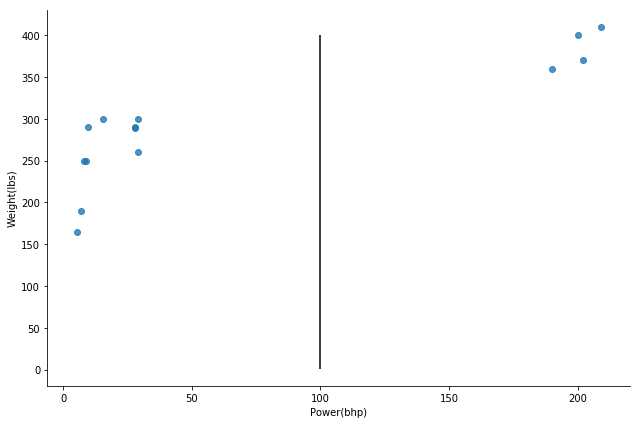

In [60]:
'''for 1 potential split'''
plotting_df=pd.DataFrame(data,columns=df.columns)
sns.lmplot(data=plotting_df,x="Power(bhp)",y="Weight(lbs)",fit_reg=False,height=6,aspect=1.5)
plt.vlines(x=split_value,ymin=1,ymax=400)
#plt.xlim(55,)

### Lowest overall entropy

In [61]:
'''Entropy defines the overall disorderness of the system. Therefore more entropy means more data is scattered'''

def calculate_entropy(data):
    label_column=data[:,-1]
    _,counts=np.unique(label_column,return_counts=True)
    #print(counts)
    probabilities=counts/counts.sum()
    entropy=sum(probabilities * -np.log2(probabilities))   #entropy=weighted sum* uncertainity value
    return entropy

In [62]:
calculate_entropy(data_above)   #beacuse that classification is unique: i.e it contains only 1 label

#'''Entropy >1 is also possible, that means it is highly disordered'''

0.0

In [63]:
def calculate_overall_entropy(data_below,data_above):
    n_data_points=len(data_below)+len(data_above)

    p_data_below=len(data_below)/n_data_points
    p_data_above=len(data_above)/n_data_points

    overall_entropy=(p_data_below * calculate_entropy(data_below)+ p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [64]:
'''Function to determine the best split out of many potential splits'''
def determine_best_split(data,potential_splits):
    
    overall_entropy=999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below,data_above=split_data(data,split_column=column_index,split_value=value)
            current_overall_entropy=calculate_overall_entropy(data_below,data_above)
        
            if current_overall_entropy <= overall_entropy:
                overall_entropy=current_overall_entropy
                best_split_column=column_index
                best_split_value=value
    
    return best_split_column,best_split_value

In [65]:
determine_best_split(data,potential_splits)

(4, 160000.0)

## Decision Tree Algorithm

subtree={question:[yes_answer,no_answer]}
example_tree={"Power(bhp) >100":["sports",{"Weight(lbs) <200":["moped",{"mileage(km) >50":["mileage","highway"]}]}]}

### Algorithm

In [66]:
'''Main algorithm'''
def decision_tree_algorithm(df,counter=0,min_samples=2,max_depth=5):
    #data preparation
    if counter==0:
        global COLUMN_HEADERS
        COLUMN_HEADERS=df.columns
        data=df.values
    else:
        data=df
    #base case
    if (check_purity(data)) or (len(data) < min_samples) or (counter==max_depth):
        classification=classify_data(data)
        return classification
    #recursive block
    else:
        counter+=1
        #helper functions
        potential_splits=get_potential_splits(data)
        split_column,split_value=determine_best_split(data,potential_splits)
        data_below,data_above=split_data(data,split_column,split_value)
        
        #instantiate subtree
        feature_name=COLUMN_HEADERS[split_column]
        question="{} <= {}".format(feature_name,split_value)
        sub_tree={question: []}
        
        #find_answers(recursion)
        yes_answer=decision_tree_algorithm(data_below,counter,min_samples,max_depth)
        no_answer=decision_tree_algorithm(data_above,counter,min_samples,max_depth)
        
        if yes_answer==no_answer:
            sub_tree=yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
        

In [67]:
tree=decision_tree_algorithm(train_df,max_depth=2)#[train_df.label!="sports"])
pprint(tree)#pruning the tree

{'Power(bhp) <= 16.9': [{'Price(Rs) <= 72500.0': ['moped', 'mileage']},
                        {'Price(Rs) <= 260000.0': ['highway', 'sports']}]}


### classification

In [68]:
'''For an example test dataset'''
example=test_df.iloc[1]
example

Engine(cc)         110
Power(bhp)         9.8
Weight(lbs)        290
Mileage(km)         88
Price(Rs)        70000
label          mileage
Name: 33, dtype: object

In [69]:
def classify_example(example,tree):
    question=list(tree.keys())[0]
    feature_name,comparison_operator,value=question.split()

    #ask question
    if example[feature_name]<=float(value):
        answer=tree[question][0]
    else:
        answer=tree[question][1]

    #base case
    if not isinstance(answer,dict):
        return answer

    #recursive function
    else: 
        residual_tree=answer
        return classify_example(example,residual_tree)

In [70]:
classify_example(example,tree)

'moped'

In [71]:
example["Price(Rs)"]<=130000

True

## Accuracy

In [72]:
'''Function to calculate accuracy'''
def calculate_accuracy(df,tree):
    df["classification"]=df.apply(classify_example,axis=1,args=(tree,))
    df["classification_correct"]=df.classification==df.label
    
    accuracy=df.classification_correct.mean()
    return accuracy

In [73]:
calculate_accuracy(test_df,tree)

0.9285714285714286

In [74]:
'''To check what rows resulted in incorrect classification'''
test_df

,Engine(cc),Power(bhp),Weight(lbs),Mileage(km),Price(Rs),label,classification,classification_correct
45,190,8.7,250,50,100000,mileage,mileage,True
33,110,9.8,290,88,70000,mileage,moped,False
17,1000,202.0,370,31,320000,sports,sports,True
46,270,28.0,290,34,200000,highway,highway,True
15,125,8.0,250,60,115000,mileage,mileage,True
13,125,15.6,300,60,80000,mileage,mileage,True
37,300,29.0,300,36,200000,highway,highway,True
26,920,209.0,410,28,298000,sports,sports,True
40,300,29.0,260,37,195000,highway,highway,True
44,110,5.2,165,45,60000,moped,moped,True


In [77]:
pprint(tree)

{'Power(bhp) <= 16.9': [{'Price(Rs) <= 72500.0': ['moped', 'mileage']},
                        {'Price(Rs) <= 260000.0': ['highway', 'sports']}]}


In [83]:
'''Overall algorithm summarised in 3 steps, to avoid ranom.seed(0) function'''

train_df, test_df=train_test_split(df,test_size=0.3)

tree=decision_tree_algorithm(train_df,max_depth=3)

accuracy=calculate_accuracy(test_df,tree)

pprint(tree)
pprint(accuracy)

[34, 13, 38, 35, 37, 18, 28, 5, 44, 24, 20, 15, 41, 11]
{'Power(bhp) <= 16.9': [{'Mileage(km) <= 47.5': ['moped', 'mileage']},
                        {'Price(Rs) <= 260000.0': ['highway', 'sports']}]}
1.0
